In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
life_expect_df = pd.read_excel('Life expectancy.xlsx')
life_expect_df

,Country,Year,Life expectancy at birth (years),Hospital beds (per 10 000 population),Incidence of tuberculosis (per 100 000 population per year),Infant mortality rate (between birth and 11 months per 1000 live births),Population using at least basic drinking-water services (%),Population using safely managed sanitation services (%),Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%),Fertility rate total (births per woman)
0,UK,2021,80.1,23.5,8.0,3.9,100.0,98,12.02,1.6
1,UK,2020,80.1,24.3,7.0,3.9,100.0,98,11.97,1.6
2,UK,2019,81.2,24.5,8.1,3.8,100.0,98,9.95,1.6
3,UK,2018,80.6,25.0,8.0,3.8,100.0,98,9.74,1.7
4,UK,2017,80.9,25.4,8.9,3.8,100.0,98,9.60,1.7
...,...,...,...,...,...,...,...,...,...,...
215,SAUDI ARABIA,2004,71.6,21.6,19.0,15.5,NaN,79,3.58,3.3
216,SAUDI ARABIA,2003,71.3,21.2,19.0,16.5,NaN,79,3.98,3.5
217,SAUDI ARABIA,2002,71.1,20.8,21.0,17.6,NaN,79,4.25,3.7
218,SAUDI ARABIA,2001,70.8,NaN,21.0,18.7,NaN,79,4.46,4.0


In [4]:
life_expect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 10 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   Country                                                                             220 non-null    object 
 1   Year                                                                                220 non-null    int64  
 2   Life expectancy at birth (years)                                                    220 non-null    float64
 3   Hospital beds (per 10 000 population)                                               190 non-null    float64
 4   Incidence of tuberculosis (per 100 000 population per year)                         220 non-null    float64
 5   Infant mortality rate (between birth and 11 months per 1000 live births)            220 non-null   

In [5]:
life_expect_df.isna().sum()

,0
Country,0
Year,0
Life expectancy at birth (years),0
Hospital beds (per 10 000 population),30
Incidence of tuberculosis (per 100 000 population per year),0
Infant mortality rate (between birth and 11 months per 1000 live births),0
Population using at least basic drinking-water services (%),22
Population using safely managed sanitation services (%),0
Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%),0
Fertility rate total (births per woman),0


Convert the column to numeric, coercing errors to Nan

In [6]:
life_expect_df['Hospital beds (per 10 000 population)'] = pd.to_numeric(life_expect_df['Hospital beds (per 10 000 population)'], errors='coerce')

# filling NaN values by calculating mean value
mean_value_bed = life_expect_df['Hospital beds (per 10 000 population)'].mean()
mean_value_water = life_expect_df['Population using at least basic drinking-water services (%)'].mean()
life_expect_df['Hospital beds (per 10 000 population)'].fillna(mean_value_bed, inplace=True)
life_expect_df['Population using at least basic drinking-water services (%)'].fillna(mean_value_water, inplace=True)
life_expect_df.isna().sum()

,0
Country,0
Year,0
Life expectancy at birth (years),0
Hospital beds (per 10 000 population),0
Incidence of tuberculosis (per 100 000 population per year),0
Infant mortality rate (between birth and 11 months per 1000 live births),0
Population using at least basic drinking-water services (%),0
Population using safely managed sanitation services (%),0
Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%),0
Fertility rate total (births per woman),0


Plot for Target (Life Expectancy) by Country

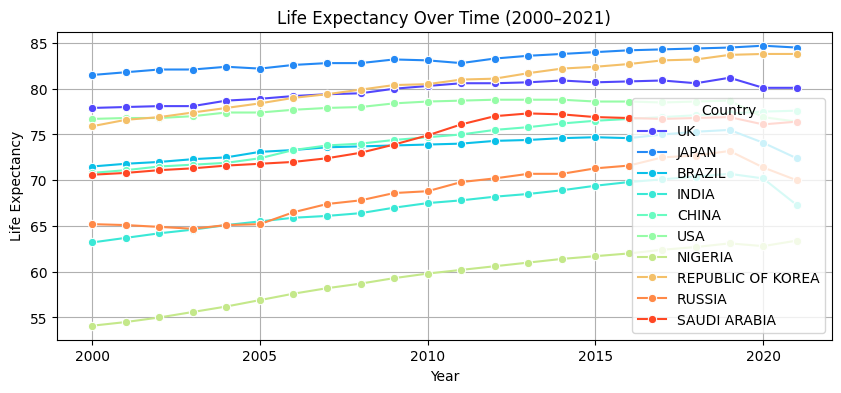

In [7]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=life_expect_df, x='Year', y='Life expectancy at birth (years)', hue='Country', marker='o', palette='rainbow')
plt.title("Life Expectancy Over Time (2000–2021)")
plt.ylabel("Life Expectancy")
plt.grid(True)
plt.show()

In [8]:
life_expect_df.nunique()

,0
Country,10
Year,22
Life expectancy at birth (years),150
Hospital beds (per 10 000 population),161
Incidence of tuberculosis (per 100 000 population per year),117
Infant mortality rate (between birth and 11 months per 1000 live births),154
Population using at least basic drinking-water services (%),45
Population using safely managed sanitation services (%),64
Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%),189
Fertility rate total (births per woman),44


In [9]:
life_expect_df.describe()

,Year,Life expectancy at birth (years),Hospital beds (per 10 000 population),Incidence of tuberculosis (per 100 000 population per year),Infant mortality rate (between birth and 11 months per 1000 live births),Population using at least basic drinking-water services (%),Population using safely managed sanitation services (%),Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%),Fertility rate total (births per woman)
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,2010.500000,73.963182,52.475789,81.811818,19.073636,91.787879,65.540909,7.063955,2.247273
std,6.358757,7.116875,38.487227,87.343244,23.474860,11.950639,30.336517,3.714036,1.291752
min,2000.000000,54.100000,5.000000,2.300000,1.800000,44.000000,6.000000,2.490000,0.800000
25%,2005.000000,70.200000,23.500000,15.000000,4.700000,91.590909,37.750000,4.245000,1.500000
50%,2010.500000,75.400000,34.700000,50.000000,7.750000,96.000000,72.500000,5.615000,1.800000
75%,2016.000000,78.825000,71.025000,94.000000,20.175000,99.000000,97.000000,8.960000,2.425000
max,2021.000000,84.700000,147.000000,322.000000,97.100000,100.000000,99.000000,18.810000,6.100000


Heat Map for Numeric Columns

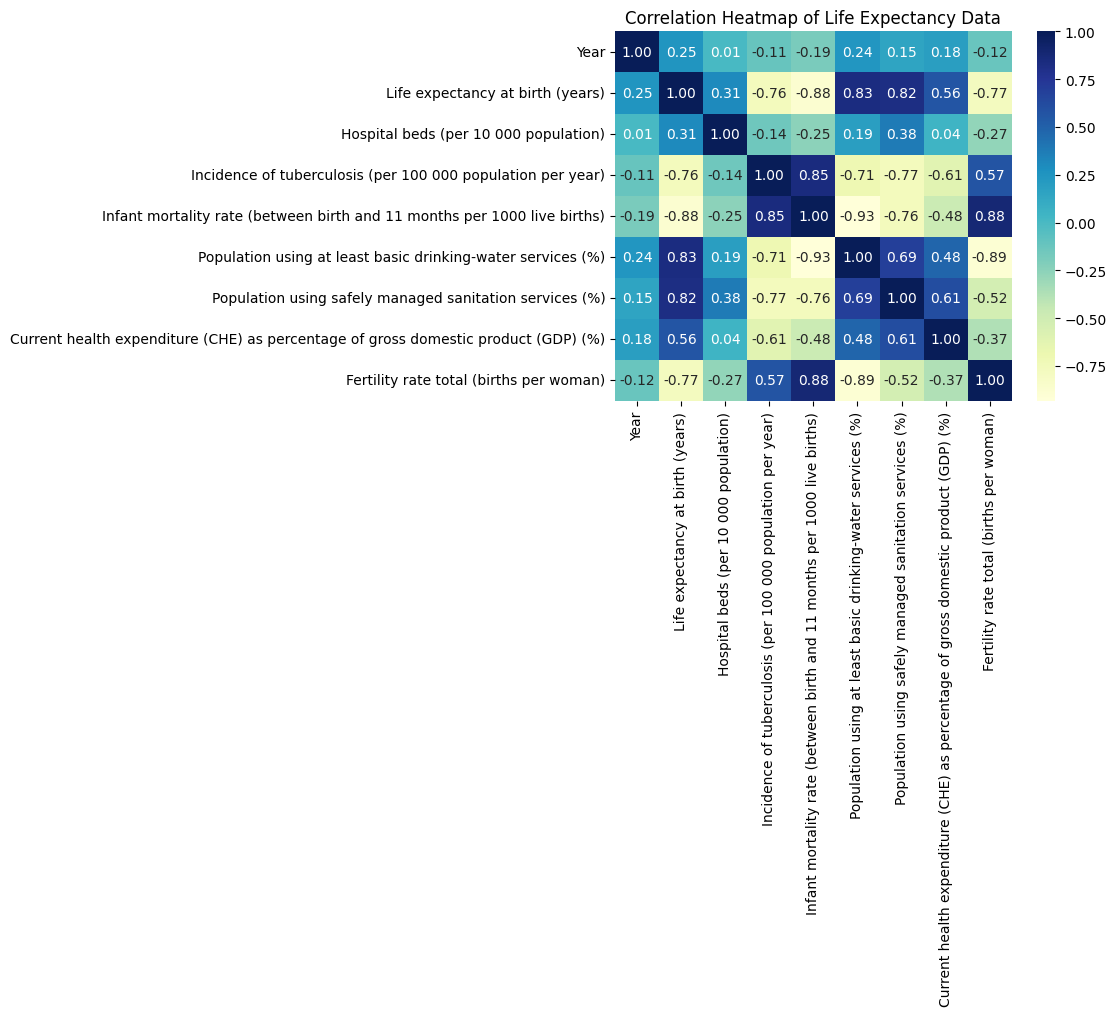

In [10]:
numeric_data = life_expect_df.select_dtypes(include=['float64', 'int64'])

# correlation between columns
sns.heatmap(numeric_data.corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Heatmap of Life Expectancy Data")
plt.show()

Plot for Fertility rate total

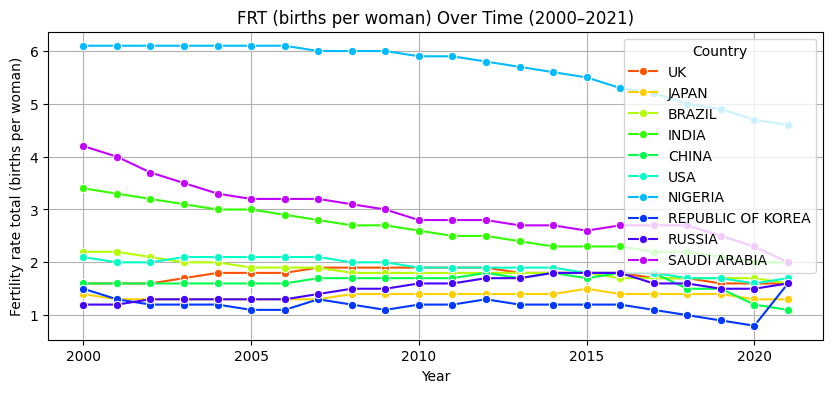

In [11]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=life_expect_df, x='Year', y='Fertility rate total (births per woman)', hue='Country', marker='o',palette='gist_rainbow')
plt.title("FRT (births per woman) Over Time (2000–2021)")
plt.ylabel("Fertility rate total (births per woman)")
plt.grid(True)
plt.show()

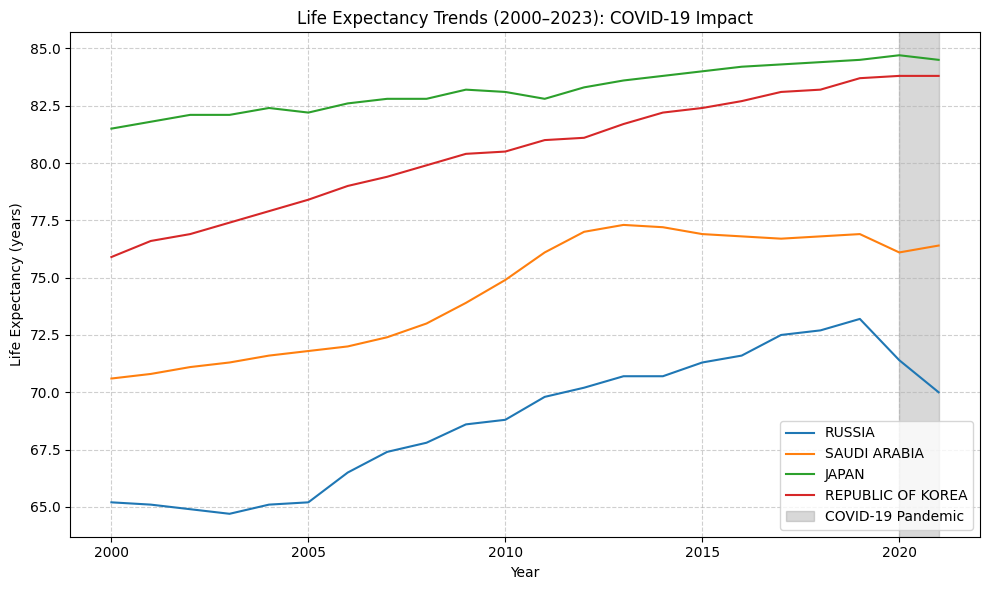

In [12]:

# Filter data for selected countries
countries = ["RUSSIA", "SAUDI ARABIA", "JAPAN", "REPUBLIC OF KOREA"]
subset = life_expect_df[life_expect_df["Country"].isin(countries)]

plt.figure(figsize=(10, 6))
for country in countries:
    country_data = subset[subset["Country"] == country]
    plt.plot(country_data["Year"], country_data["Life expectancy at birth (years)"], label=country)

plt.axvspan(2020, 2021, color='gray', alpha=0.3, label="COVID-19 Pandemic")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (years)")
plt.title("Life Expectancy Trends (2000–2023): COVID-19 Impact")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


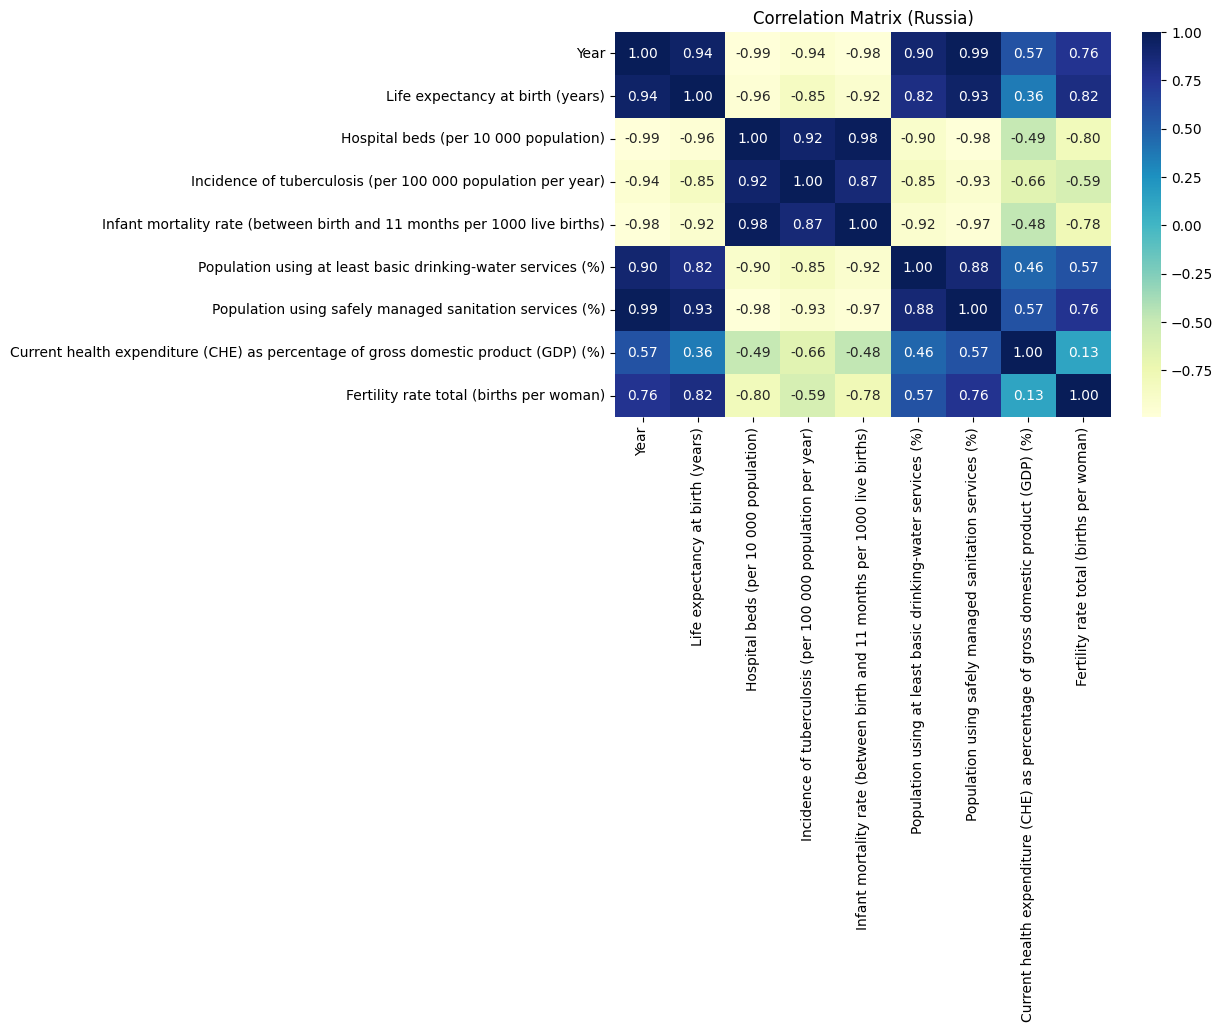

Correlation with Life Expectancy (Russia):
Life expectancy at birth (years)                                                      1.000000
Year                                                                                  0.935080
Population using safely managed sanitation services (%)                               0.930865
Fertility rate total (births per woman)                                               0.822590
Population using at least basic drinking-water services (%)                           0.819824
Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)    0.355246
Incidence of tuberculosis (per 100 000 population per year)                          -0.845909
Infant mortality rate (between birth and 11 months per 1000 live births)             -0.919718
Hospital beds (per 10 000 population)                                                -0.958187
Name: Life expectancy at birth (years), dtype: float64


In [14]:
# Filter Russia data
russia_df = life_expect_df[life_expect_df["Country"] == "RUSSIA"]

russia_numeric = russia_df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix_russia = russia_numeric.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix_russia, annot=True, cmap="YlGnBu", center=0, fmt=".2f")
plt.title("Correlation Matrix (Russia)")
plt.show()

# Print correlation with target separately
print("Correlation with Life Expectancy (Russia):")
print(corr_matrix_russia["Life expectancy at birth (years)"].sort_values(ascending=False))

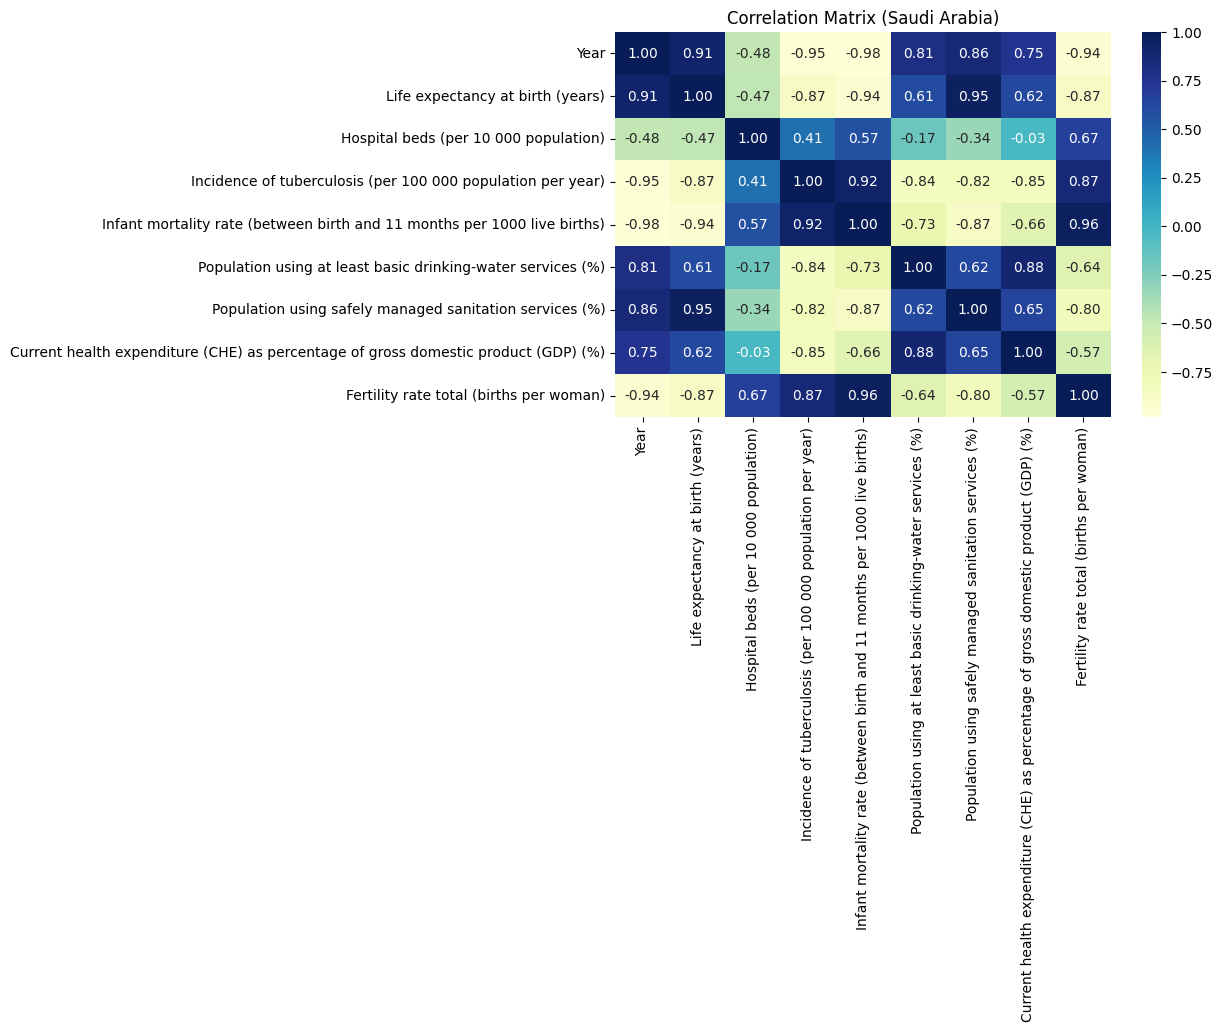

Correlation with Life Expectancy (Saudi Arabia):
Life expectancy at birth (years)                                                      1.000000
Population using safely managed sanitation services (%)                               0.946851
Year                                                                                  0.911690
Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)    0.624670
Population using at least basic drinking-water services (%)                           0.608403
Hospital beds (per 10 000 population)                                                -0.470827
Incidence of tuberculosis (per 100 000 population per year)                          -0.868405
Fertility rate total (births per woman)                                              -0.869465
Infant mortality rate (between birth and 11 months per 1000 live births)             -0.942974
Name: Life expectancy at birth (years), dtype: float64


In [15]:
# Filter Saudi Arabia data
saudi_df = life_expect_df[life_expect_df["Country"] == "SAUDI ARABIA"]

saudi_numeric = saudi_df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix_saudi = saudi_numeric.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix_saudi, annot=True, cmap="YlGnBu", center=0, fmt=".2f")
plt.title("Correlation Matrix (Saudi Arabia)")
plt.show()

# Print correlation with target separately
print("Correlation with Life Expectancy (Saudi Arabia):")
print(corr_matrix_saudi["Life expectancy at birth (years)"].sort_values(ascending=False))


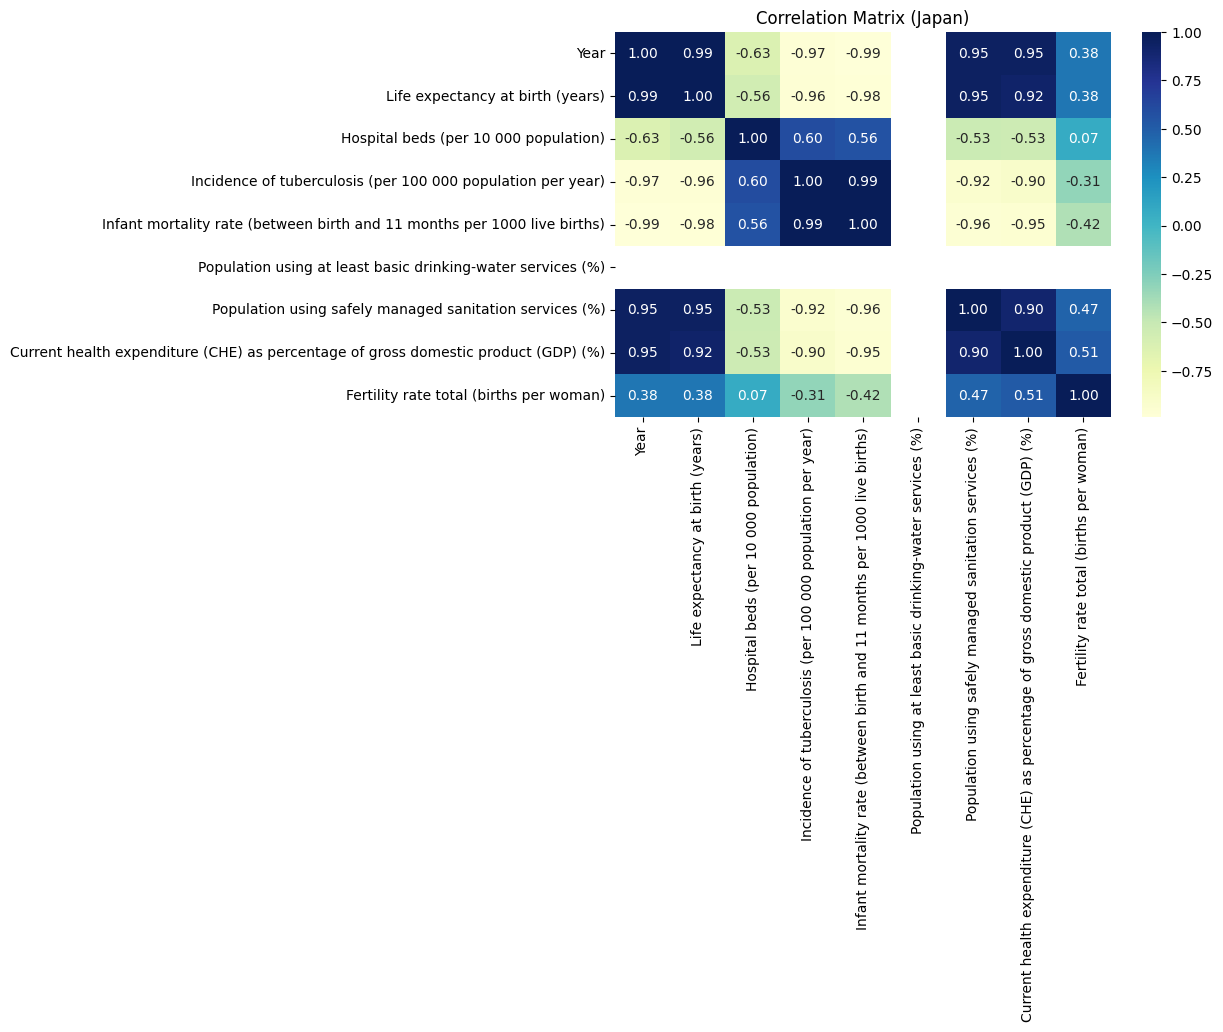

Correlation with Life Expectancy (Japan):
Life expectancy at birth (years)                                                      1.000000
Year                                                                                  0.985704
Population using safely managed sanitation services (%)                               0.950078
Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)    0.918511
Fertility rate total (births per woman)                                               0.376703
Hospital beds (per 10 000 population)                                                -0.563277
Incidence of tuberculosis (per 100 000 population per year)                          -0.960481
Infant mortality rate (between birth and 11 months per 1000 live births)             -0.979235
Population using at least basic drinking-water services (%)                                NaN
Name: Life expectancy at birth (years), dtype: float64


In [16]:
# Filter Japan data
japan_df = life_expect_df[life_expect_df["Country"] == "JAPAN"]

japan_numeric = japan_df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix_japan = japan_numeric.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix_japan, annot=True, cmap="YlGnBu", center=0, fmt=".2f")
plt.title("Correlation Matrix (Japan)")
plt.show()

# Print correlation with target separately
print("Correlation with Life Expectancy (Japan):")
print(corr_matrix_japan["Life expectancy at birth (years)"].sort_values(ascending=False))

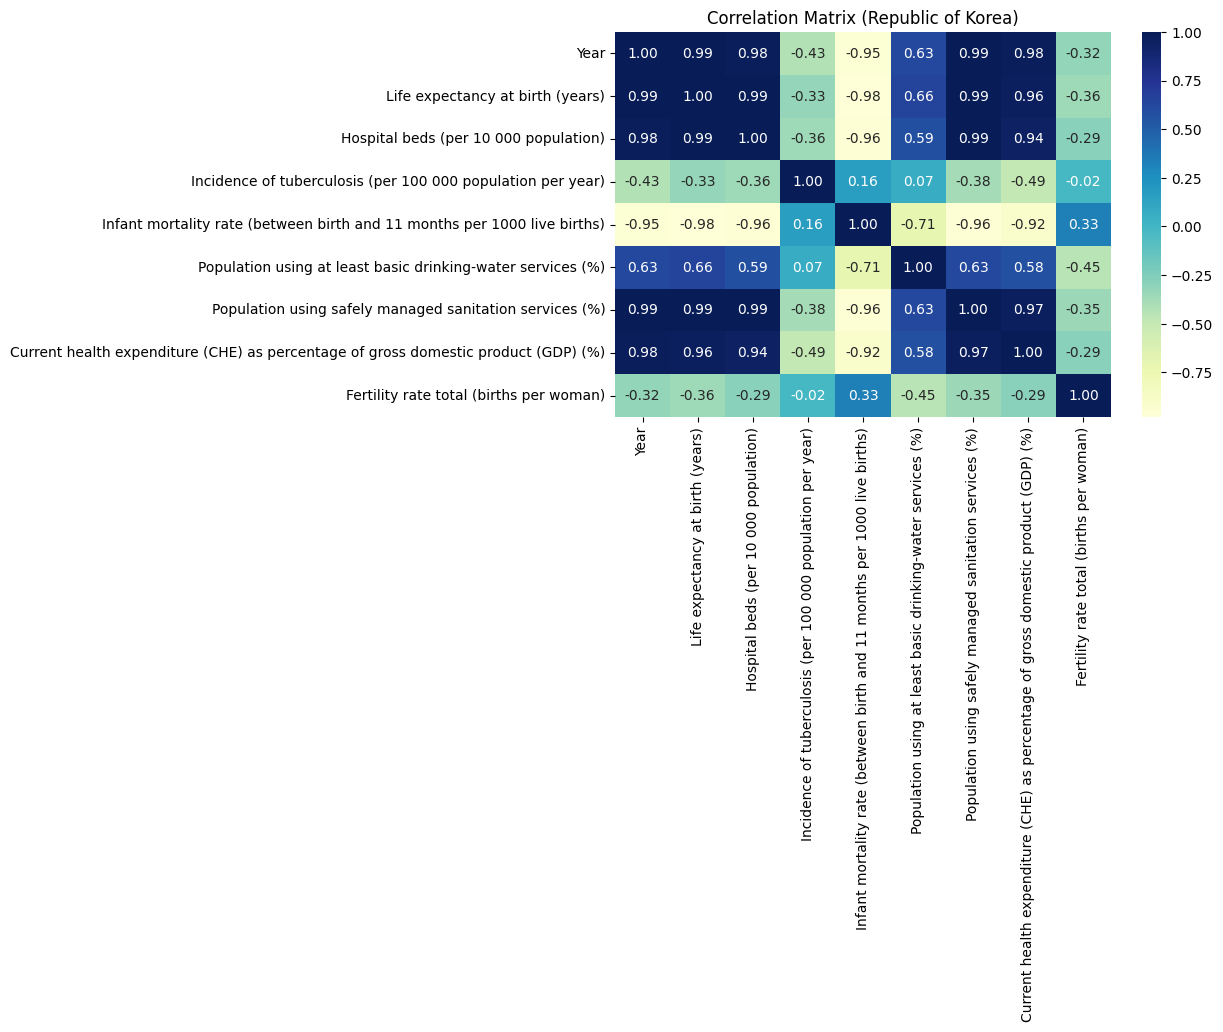

Correlation with Life Expectancy (Republic of Korea):
Life expectancy at birth (years)                                                      1.000000
Year                                                                                  0.935080
Population using safely managed sanitation services (%)                               0.930865
Fertility rate total (births per woman)                                               0.822590
Population using at least basic drinking-water services (%)                           0.819824
Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%)    0.355246
Incidence of tuberculosis (per 100 000 population per year)                          -0.845909
Infant mortality rate (between birth and 11 months per 1000 live births)             -0.919718
Hospital beds (per 10 000 population)                                                -0.958187
Name: Life expectancy at birth (years), dtype: float64


In [17]:
# Filter Republic of Korea data
korea_df = life_expect_df[life_expect_df["Country"] == "REPUBLIC OF KOREA"]

korea_numeric = korea_df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix_korea = korea_numeric.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix_korea, annot=True, cmap="YlGnBu", center=0, fmt=".2f")
plt.title("Correlation Matrix (Republic of Korea)")
plt.show()

# Print correlation with target separately
print("Correlation with Life Expectancy (Republic of Korea):")
print(corr_matrix_russia["Life expectancy at birth (years)"].sort_values(ascending=False))

### Note:


During COVID-19, **Russia and Saudi Arabia** faced a bigger drop in life expectancy compared to **Japan and South Korea**, mainly due to weaker healthcare systems and hospital capacity. Russia showed a strong negative correlation between hospital beds and life expectancy (-0.95), while Saudi Arabia also had a weaker link (-0.47). In contrast, Japan and South Korea had stronger medical infrastructure, more hospital beds, and effective pandemic management strategies, which allowed them to handle COVID-19 cases more effectively.

Another key factor was **pre-existing health burdens**. Russia and Saudi Arabia had higher infant mortality and tuberculosis rates, both negatively correlated with life expectancy, making their populations more vulnerable to COVID-19 deaths. On the other hand, Japan and South Korea had healthier populations with lower rates of these diseases, contributing to stronger resilience during the pandemic.

Finally, **public health policies and vaccination efforts** played a major role. Saudi Arabia did show a high correlation of sanitation with life expectancy (0.94), but its adoption was slower compared to East Asia. Russia struggled with inconsistent policies and lower vaccination acceptance. In contrast, Japan and South Korea demonstrated very high correlations between health expenditure and life expectancy (Japan: 0.95, Korea: 0.97) and implemented strict interventions such as early mask use, digital tracking, and quarantine compliance. These measures prevented large-scale mortality and minimized the impact on life expectancy.


In [18]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

life_expect_df = life_expect_df.sort_values(['Country', 'Year']).reset_index(drop=True)

life_le = LabelEncoder()
life_expect_df['Country_enc'] = life_le.fit_transform(life_expect_df['Country'])
life_expect_df['Country_enc'].value_counts()

,count
Country_enc,
0,22
1,22
2,22
3,22
4,22
5,22
6,22
7,22
8,22


In [19]:
life_expect_df

,Country,Year,Life expectancy at birth (years),Hospital beds (per 10 000 population),Incidence of tuberculosis (per 100 000 population per year),Infant mortality rate (between birth and 11 months per 1000 live births),Population using at least basic drinking-water services (%),Population using safely managed sanitation services (%),Current health expenditure (CHE) as percentage of gross domestic product (GDP) (%),Fertility rate total (births per woman),Country_enc
0,BRAZIL,2000,71.5,27.800000,51.0,29.1,93.0,36,8.33,2.2,0
1,BRAZIL,2001,71.8,27.500000,48.0,27.3,94.0,36,8.55,2.2,0
2,BRAZIL,2002,72.0,25.600000,52.0,25.5,94.0,37,8.70,2.1,0
3,BRAZIL,2003,72.3,24.000000,53.0,23.9,94.0,37,8.19,2.0,0
4,BRAZIL,2004,72.5,52.475789,54.0,22.4,95.0,37,8.12,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...
215,USA,2017,78.5,28.200000,3.0,5.6,100.0,97,16.75,1.8,9
216,USA,2018,78.6,27.800000,2.9,5.6,100.0,97,16.62,1.7,9
217,USA,2019,78.7,27.500000,2.9,5.5,100.0,97,16.66,1.7,9
218,USA,2020,76.9,27.400000,2.3,5.5,100.0,97,18.81,1.6,9


In [ ]:
# Define target and exclude identifier columns from features
target = 'Life expectancy at birth (years)'
exclude_cols = ['Country', 'Year', target]
features = [col for col in life_expect_df.columns if col not in exclude_cols]

In [ ]:
look_back = 3  # Number of past years to use as features

life_X, life_y, year_list, country_list = [], [], [], []

for country in life_expect_df['Country'].unique():
    # Get data for this country and sort by year
    country_data = life_expect_df[life_expect_df['Country'] == country].sort_values('Year')
    features_data = country_data[features].values
    target_data = country_data[target].values
    years_data = country_data['Year'].values

    # Create samples using sliding window
    for i in range(len(country_data) - look_back):
        life_X.append(features_data[i:i+look_back])
        life_y.append(target_data[i+look_back])
        year_list.append(years_data[i+look_back])
        country_list.append(country)

# Convert to numpy arrays
life_X = np.array(life_X)
life_y = np.array(life_y)
year_list = np.array(year_list)
country_list = np.array(country_list)

# Split into train and test sets
train_idx = year_list <= 2018  # Train: up to 2018
test_idx = year_list > 2018    # Test: 2019, 2020, 2021

X_train, y_train = life_X[train_idx], life_y[train_idx]
X_test, y_test = life_X[test_idx], life_y[test_idx]
test_countries = country_list[test_idx]
test_years = year_list[test_idx]

In [ ]:
print("Training Samples for Life Expectancy:", X_train.shape[0])
print("Testing Samples for Life Expectancy :", X_test.shape[0])

Training Samples for Life Expectancy: 160
Testing Samples for Life Expectancy : 30


In [ ]:
X_train

array([[[27.8       , 51.        , 29.1       , ...,  8.33      ,
          2.2       ,  0.        ],
        [27.5       , 48.        , 27.3       , ...,  8.55      ,
          2.2       ,  0.        ],
        [25.6       , 52.        , 25.5       , ...,  8.7       ,
          2.1       ,  0.        ]],

       [[27.5       , 48.        , 27.3       , ...,  8.55      ,
          2.2       ,  0.        ],
        [25.6       , 52.        , 25.5       , ...,  8.7       ,
          2.1       ,  0.        ],
        [24.        , 53.        , 23.9       , ...,  8.19      ,
          2.        ,  0.        ]],

       [[25.6       , 52.        , 25.5       , ...,  8.7       ,
          2.1       ,  0.        ],
        [24.        , 53.        , 23.9       , ...,  8.19      ,
          2.        ,  0.        ],
        [52.47578947, 54.        , 22.4       , ...,  8.12      ,
          2.        ,  0.        ]],

       ...,

       [[28.6       ,  3.3       ,  5.9       , ..., 15.99     

In [ ]:
X_test

array([[[ 23.2       ,  43.        ,  14.6       ,  98.        ,
          45.        ,   9.17      ,   1.7       ,   0.        ],
        [ 23.        ,  44.        ,  13.3       ,  98.        ,
          46.        ,   9.47      ,   1.7       ,   0.        ],
        [ 22.6       ,  46.        ,  13.1       ,  99.        ,
          47.        ,   9.46      ,   1.7       ,   0.        ]],

       [[ 23.        ,  44.        ,  13.3       ,  98.        ,
          46.        ,   9.47      ,   1.7       ,   0.        ],
        [ 22.6       ,  46.        ,  13.1       ,  99.        ,
          47.        ,   9.46      ,   1.7       ,   0.        ],
        [ 22.4       ,  46.        ,  13.        ,  99.        ,
          48.        ,   9.61      ,   1.7       ,   0.        ]],

       [[ 22.6       ,  46.        ,  13.1       ,  99.        ,
          47.        ,   9.46      ,   1.7       ,   0.        ],
        [ 22.4       ,  46.        ,  13.        ,  99.        ,
          48. 

In [ ]:
# Display each test sample's year, country, and its corresponding input features
for i in range(len(X_test)):
    print(f"Sample {i + 1}:")
    print(f"  Country: {test_countries[i]}")
    print(f"  Year: {test_years[i]}")
    print(f"  Input features (look_back={look_back}):")

    for t in range(look_back):
        print(f"    Time step {t + 1}: {X_test[i][t]}")

    print("-" * 60)


Sample 1:
  Country: BRAZIL
  Year: 2019
  Input features (look_back=3):
    Time step 1: [23.2  43.   14.6  98.   45.    9.17  1.7   0.  ]
    Time step 2: [23.   44.   13.3  98.   46.    9.47  1.7   0.  ]
    Time step 3: [22.6  46.   13.1  99.   47.    9.46  1.7   0.  ]
------------------------------------------------------------
Sample 2:
  Country: BRAZIL
  Year: 2020
  Input features (look_back=3):
    Time step 1: [23.   44.   13.3  98.   46.    9.47  1.7   0.  ]
    Time step 2: [22.6  46.   13.1  99.   47.    9.46  1.7   0.  ]
    Time step 3: [22.4  46.   13.   99.   48.    9.61  1.7   0.  ]
------------------------------------------------------------
Sample 3:
  Country: BRAZIL
  Year: 2021
  Input features (look_back=3):
    Time step 1: [22.6  46.   13.1  99.   47.    9.46  1.7   0.  ]
    Time step 2: [22.4  46.   13.   99.   48.    9.61  1.7   0.  ]
    Time step 3: [24.3  45.   12.8  99.   49.    9.62  1.7   0.  ]
--------------------------------------------------------

### LSTM Regression Model

In [ ]:
import numpy as np
import tensorflow as tf
import random
import os
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

# Setting the seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

# --- Scale y ---
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1))
y_test_scaled  = scaler_y.transform(y_test.reshape(-1,1))


life_model = Sequential()
life_model.add(LSTM(50, activation='relu', input_shape=(look_back, len(features))))

life_model.add(Dense(1, activation='relu'))
life_model.compile(optimizer='adam', loss='mse')

life_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), shuffle=False)
y_pred = life_model.predict(X_test)

# Regression Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nLife Expectancy in LSTM R²: {r2:.4f}")
print(f"Life Expectancy in LSTM MAE: {mae:.4f}")
print(f"Life Expectancy in LSTM MSE: {mse:.4f}")
print(f"Life Expectancy in LSTM RMSE: {rmse:.4f}")

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 194ms/step - loss: 4521.5342 - val_loss: 3921.7996
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 3675.2439 - val_loss: 3186.5466
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 3037.6030 - val_loss: 2359.6790
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2438.9287 - val_loss: 1562.1917
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1822.3147 - val_loss: 860.3619
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1124.5243 - val_loss: 366.3288
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 471.9445 - val_loss: 180.0101
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 232.6724 - val_loss: 164.4863
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 177.9497 - val_loss: 119.2768
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 126.9601 - val_loss: 60.9070
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 81.6004 - val_loss: 40.0341
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━

In [ ]:
# Convert predictions to 1D array for easier display
y_pred_flat = y_pred.flatten()
y_test_flat = y_test.flatten()

print("\nFirst 10 Actual vs Predicted Life Expectancy:")
for actual, predicted in list(zip(y_test_flat, y_pred_flat))[:10]:
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")


First 10 Actual vs Predicted Life Expectancy:
Actual: 75.50, Predicted: 76.92
Actual: 74.10, Predicted: 77.48
Actual: 72.40, Predicted: 77.53
Actual: 77.30, Predicted: 77.72
Actual: 77.50, Predicted: 77.86
Actual: 77.60, Predicted: 78.38
Actual: 70.70, Predicted: 67.84
Actual: 70.20, Predicted: 65.15
Actual: 67.30, Predicted: 62.36
Actual: 84.50, Predicted: 82.52


Plot actual vs predicted values

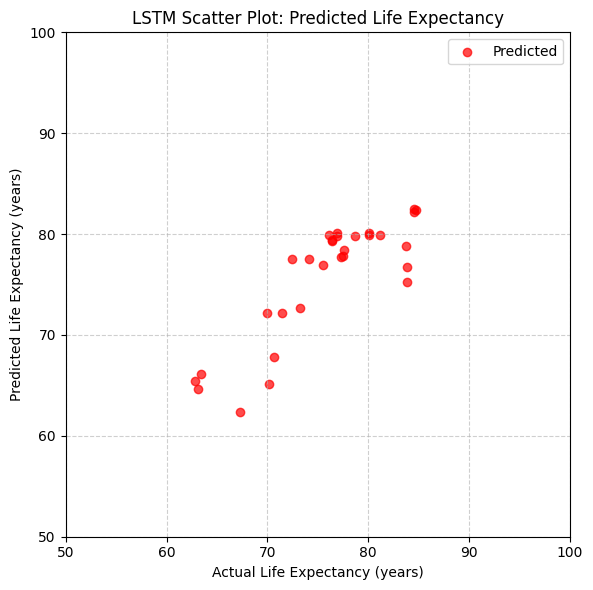

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='red', alpha=0.7, label="Predicted")

# Axes scale from 50 to 100 with equal aspect
plt.xlim(50, 100)
plt.ylim(50, 100)
plt.gca().set_aspect('equal', adjustable='box')

plt.xlabel("Actual Life Expectancy (years)")
plt.ylabel("Predicted Life Expectancy (years)")
plt.title("LSTM Scatter Plot: Predicted Life Expectancy")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
print("\nLife Expectancy Inputs (2018-2020) used for the Prediction of 2021\n")

for country in life_expect_df['Country'].unique():

    country_data = life_expect_df[life_expect_df['Country'] == country].sort_values('Year')

    # Printing Country wise life expectancy for the years 2018, 2019, 2020
    print(f"--- {country} ---")
    for year in [2018, 2019, 2020]:
        value = country_data[country_data['Year'] == year]['Life expectancy at birth (years)']
        if not value.empty:
            print(f"Year: {year}, Life Expectancy: {value.values[0]:.2f}")

    # Actual 2021 life expectancy
    actual_2021 = country_data[country_data['Year'] == 2021]['Life expectancy at birth (years)']
    if not actual_2021.empty:
        print(f"Actual 2021 Life Expectancy: {actual_2021.values[0]:.2f}")
    else:
        print("Actual 2021 not available")

    # Predicted 2021 life expectancy from model
    idx = np.where((test_years == 2021) & (test_countries == country))[0]
    if len(idx) > 0:
        print(f"Predicted 2021 Life Expectancy: {y_pred[idx[0]][0]:.2f}")
    else:
        print("Prediction not available")
    print()


Life Expectancy Inputs (2018-2020) used for the Prediction of 2021

--- BRAZIL ---
Year: 2018, Life Expectancy: 75.30
Year: 2019, Life Expectancy: 75.50
Year: 2020, Life Expectancy: 74.10
Actual 2021 Life Expectancy: 72.40
Predicted 2021 Life Expectancy: 77.53

--- CHINA ---
Year: 2018, Life Expectancy: 77.10
Year: 2019, Life Expectancy: 77.30
Year: 2020, Life Expectancy: 77.50
Actual 2021 Life Expectancy: 77.60
Predicted 2021 Life Expectancy: 78.38

--- INDIA ---
Year: 2018, Life Expectancy: 70.40
Year: 2019, Life Expectancy: 70.70
Year: 2020, Life Expectancy: 70.20
Actual 2021 Life Expectancy: 67.30
Predicted 2021 Life Expectancy: 62.36

--- JAPAN ---
Year: 2018, Life Expectancy: 84.40
Year: 2019, Life Expectancy: 84.50
Year: 2020, Life Expectancy: 84.70
Actual 2021 Life Expectancy: 84.50
Predicted 2021 Life Expectancy: 82.14

--- NIGERIA ---
Year: 2018, Life Expectancy: 62.70
Year: 2019, Life Expectancy: 63.10
Year: 2020, Life Expectancy: 62.80
Actual 2021 Life Expectancy: 63.40
Pr

### GRU Regression Model

In [ ]:
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler

# --- GRU Model ---
life_model = Sequential()
life_model.add(GRU(128, return_sequences=True, input_shape=(look_back, len(features))))
life_model.add(Dropout(0.2))
life_model.add(GRU(64))
life_model.add(Dropout(0.2))
life_model.add(Dense(32, activation='relu'))
life_model.add(Dense(1))  # Linear output for regression

life_model.compile(optimizer='adam', loss='mse')

# --- Callbacks for better training ---
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# --- Training ---
life_model.fit(X_train, y_train_scaled,
               epochs=50, batch_size=32,
               validation_data=(X_test, y_test_scaled),
               shuffle=False,
               callbacks=[early_stop, lr_reduction])

# --- Predictions (inverse scaling) ---
y_pred_scaled = life_model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# --- Evaluation ---
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nLife Expectancy in GRU R²: {r2:.4f}")
print(f"Life Expectancy in GRU MAE: {mae:.4f}")
print(f"Life Expectancy in GRU MSE: {mse:.4f}")
print(f"Life Expectancy in GRU RMSE: {rmse:.4f}")

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - loss: 0.1600 - val_loss: 0.0216 - learning_rate: 0.0010
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0581 - val_loss: 0.0189 - learning_rate: 0.0010
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0462 - val_loss: 0.0174 - learning_rate: 0.0010
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0333 - val_loss: 0.0250 - learning_rate: 0.0010
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0314 - val_loss: 0.0203 - learning_rate: 0.0010
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0368 - val_loss: 0.0139 - learning_rate: 0.0010
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0272 - val_loss: 0.0206 - learning_rate: 0.0010
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0268 - val_loss: 0.0175 - learning_rate: 0.0010
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0316 - val_loss: 0.0140 - learning_rate: 0.0010
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━

Plot actual vs predicted values

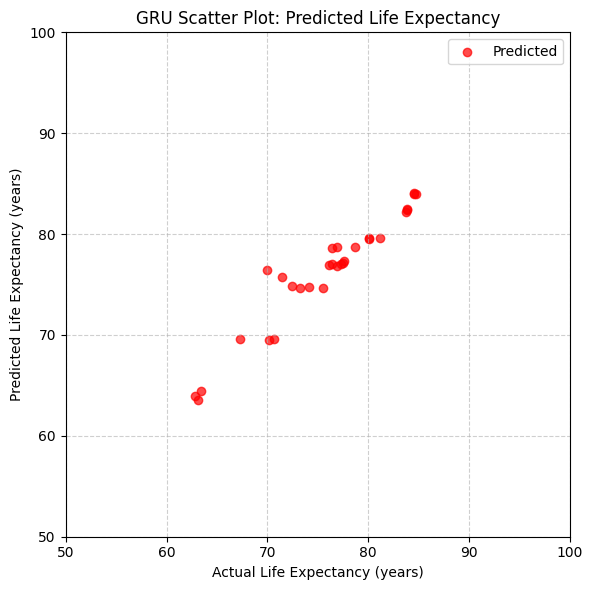

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='red', alpha=0.7, label="Predicted")

# Axes scale from 50 to 100 with equal aspect
plt.xlim(50, 100)
plt.ylim(50, 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("Actual Life Expectancy (years)")
plt.ylabel("Predicted Life Expectancy (years)")
plt.title("GRU Scatter Plot: Predicted Life Expectancy")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Transformer Regression Model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention
from tensorflow.keras.layers import Dropout, Add, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
import numpy as np

num_heads = 3
embed_dim = len(features)
ff_dim = 64
look_back = X_train.shape[1]

life_inputs = Input(shape=(look_back, len(features)))

# Attention block
life_atten_output = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)(life_inputs, life_inputs)
life_atten_output = Dropout(0.1)(life_atten_output)
life_atten_output = Add()([life_inputs, life_atten_output])
life_atten_output = LayerNormalization(epsilon=1e-6)(life_atten_output)

# Feed forward
life_ff_output = Dense(ff_dim, activation='relu')(life_atten_output)
life_ff_output = Dense(embed_dim, activation='relu')(life_ff_output)
life_ff_output = Add()([life_atten_output, life_ff_output])
life_ff_output = LayerNormalization(epsilon=1e-6)(life_ff_output)

# Replace Flatten with GlobalAveragePooling
pool = GlobalAveragePooling1D()(life_ff_output)
life_outputs = Dense(1)(pool)   # Linear output

# Model
transformer_model = Model(inputs=life_inputs, outputs=life_outputs)
transformer_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train
transformer_model.fit(X_train, y_train_scaled, epochs=50, batch_size=32, validation_data=(X_test, y_test_scaled), shuffle=False)

# Predictions (inverse scale)
y_pred_scaled = transformer_model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nLife Expectancy in Transformer R²: {r2:.4f}")
print(f"Life Expectancy in Transformer MAE: {mae:.4f}")
print(f"Life Expectancy in Transformer MSE: {mse:.4f}")
print(f"Life Expectancy in Transformer RMSE: {rmse:.4f}")


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.5858 - val_loss: 0.5801
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3843 - val_loss: 0.3548
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.2915 - val_loss: 0.2338
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2174 - val_loss: 0.1678
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1660 - val_loss: 0.1278
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1244 - val_loss: 0.1005
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0934 - val_loss: 0.0836
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0769 - val_loss: 0.0724
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0629 - val_loss: 0.0635
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0528 - val_loss: 0.0557
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0477 - val_loss: 0.0488
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0457 - val_loss: 0.0431
E

Plot actual vs predicted values

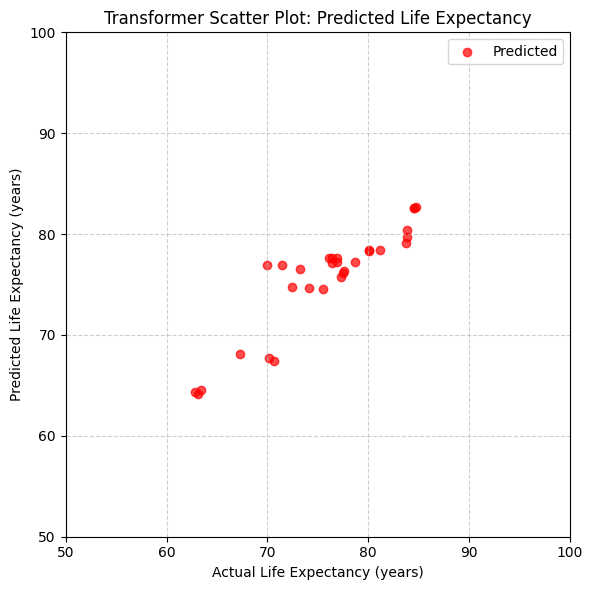

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='red', alpha=0.7, label="Predicted")

# Axes scale from 50 to 100 with equal aspect
plt.xlim(50, 100)
plt.ylim(50, 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("Actual Life Expectancy (years)")
plt.ylabel("Predicted Life Expectancy (years)")
plt.title("Transformer Scatter Plot: Predicted Life Expectancy")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Gradient Boosting Regression Model

In [ ]:
from sklearn.model_selection import GridSearchCV as life_cv_grid
from sklearn.ensemble import GradientBoostingRegressor as life_gb_regressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

reg_params_life = {
          'loss': ['squared_error','absolute_error','quantile','huber'],
          'learning_rate': [0.1, 0.001, 0.0001, 0.3],
          'n_estimators': [30, 60, 100],
          'criterion': ['friedman_mse','squared_error']
}

life_ml_mod = life_gb_regressor(random_state=41)

# Reshape X_train and X_test for Gradient Boosting
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)


life_ml_mod = life_cv_grid(life_ml_mod, reg_params_life, cv=2)
life_ml_mod.fit(X_train_reshaped, y_train)
print("Selected Regression Parameters GBR:\n", life_ml_mod.best_params_)

life_ml_mod = life_ml_mod.best_estimator_
life_ml_mod.fit(X_train_reshaped, y_train)

y_pred = life_ml_mod.predict(X_test_reshaped)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nLife Expectancy in GBR R²: {r2:.4f}")
print(f"Life Expectancy in GBR MAE : {mae:.4f}")
print(f"Life Expectancy in GBR MSE : {mse:.4f}")
print(f"Life Expectancy in GBR RMSE: {rmse:.4f}")

Selected Regression Parameters GBR:
 {'criterion': 'squared_error', 'learning_rate': 0.1, 'loss': 'squared_error', 'n_estimators': 30}

Life Expectancy in GBR R²: 0.9407
Life Expectancy in GBR MAE : 1.2267
Life Expectancy in GBR MSE : 2.3638
Life Expectancy in GBR RMSE: 1.5375


### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor as life_rf_regressor

reg_params_life = {
          'min_samples_split': [1, 2, 3, 6],
          'max_depth': [3, 6, 10],
          'n_estimators': [30, 60, 100],
          'criterion': ['friedman_mse','squared_error','absolute_error','poisson']
}

life_ml_mod = life_rf_regressor(random_state=41)
life_ml_mod = life_cv_grid(life_ml_mod, reg_params_life, cv=2)
life_ml_mod.fit(X_train_reshaped, y_train)
print("Selected Regression Parameters RFR:\n", life_ml_mod.best_params_)

life_ml_mod = life_ml_mod.best_estimator_
life_ml_mod.fit(X_train_reshaped, y_train)

y_pred = life_ml_mod.predict(X_test_reshaped)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nLife Expectancy in RFR R²: {r2:.4f}")
print(f"Life Expectancy in RFR MAE : {mae:.4f}")
print(f"Life Expectancy in RFR MSE : {mse:.4f}")
print(f"Life Expectancy in RFR RMSE: {rmse:.4f}")

Selected Regression Parameters RFR:
 {'criterion': 'friedman_mse', 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 30}

Life Expectancy in RFR R²: 0.9227
Life Expectancy in RFR MAE : 1.4286
Life Expectancy in RFR MSE : 3.0787
Life Expectancy in RFR RMSE: 1.7546


### Linear Regression Regressor

In [ ]:
from sklearn.linear_model import LinearRegression as life_line_regressor

reg_params_life = {
          'fit_intercept': [True, False],
          'copy_X': [True, False],
          'n_jobs': [3, 6, 10]
}

life_ml_mod = life_line_regressor()
life_ml_mod = life_cv_grid(life_ml_mod, reg_params_life, cv=2)
life_ml_mod.fit(X_train_reshaped, y_train)
print("Selected Regression Parameters LRR:\n", life_ml_mod.best_params_)

life_ml_mod = life_ml_mod.best_estimator_
life_ml_mod.fit(X_train_reshaped, y_train)

y_pred = life_ml_mod.predict(X_test_reshaped)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nLife Expectancy in LRR R²: {r2:.4f}")
print(f"Life Expectancy in LRR MAE : {mae:.4f}")
print(f"Life Expectancy in LRR MSE : {mse:.4f}")
print(f"Life Expectancy in LRR RMSE: {rmse:.4f}")

Selected Regression Parameters LRR:
 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 3}

Life Expectancy in LRR R²: 0.8031
Life Expectancy in LRR MAE : 2.1952
Life Expectancy in LRR MSE : 7.8429
Life Expectancy in LRR RMSE: 2.8005
